## 교차검증 
## Cross Validation


교차검증의 종류
 

1. KFold CV : 가장 보편적인 교차 검증 기법. 회귀분석

   :  k-1개의 train세트와 1개의 test(or 검증)세트로 k번 검증 평가를 해서 평균으로 최종평가를 냄

 

회귀에서 Stratified KFold는 지원하지 않고, KFold만 사용가능. 회귀의 연속된 숫자값을 결정값별로 분포를 정할      필요 없기 때문.
분류에서 사용할 때 문제점 : 레이블 데이터가 불균형일 때 너무 편파적으로 나뉨.

![K-Fold Cross Validation](kfoldcv.png)

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


cross-val-score 
[0.96666667 1.         0.93333333 0.96666667 1.        ]
cross-val-score.mean 
0.973


C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
iris = load_iris()

In [10]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=5) # model, train, target, cross validation

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.96666667 1.         0.93333333 0.96666667 1.        ]
cross-val-score.mean 
0.973


계층별 K-겹 교차 검증

In [13]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np


In [14]:
iris = load_iris()

In [15]:
print('iris label \n{}'.format(iris.target))
print('''iris label's bin \n{}'''.format(np.bincount(iris.target)))

iris label 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris label's bin 
[50 50 50]


STRATIFIED CROSS VALIDATION
계층별 k-겹 교차 검증

Stratified KFold CV : 불균형한 분포도를 가진 레이블에 쓰임. 분류분석

 

Stratified Kfold 는 Kfold가 레이블 데이터가 제대로 분배되지 못하는 경우의 문제를 해결해 준다. 
원본 데이터의 레이블 분포를 먼저 고려한뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배하는 방식
레이블 분포에 따라 학습/테스트 세트를 나눔
 

In [4]:
!pip install mglearn

You should consider upgrading via the 'c:\python39-at\python.exe -m pip install --upgrade pip' command.


  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=8969383cfee8f4a09dc61f6b6268374a7c1349bfb8f6d2609b8d073c4af206f0
  Stored in directory: c:\users\jaemi\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


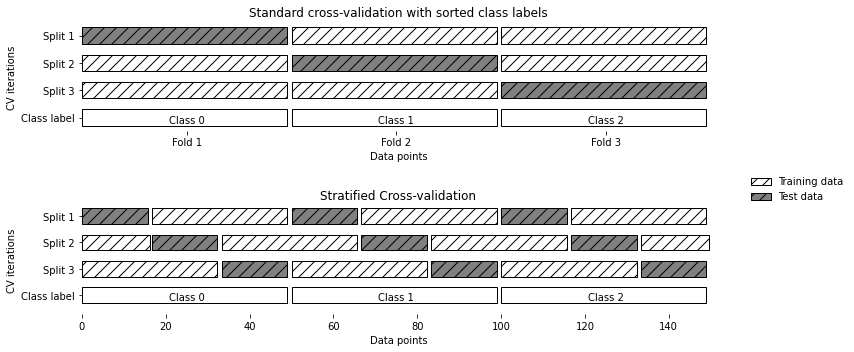

In [8]:
 import mglearn



# matplotlob 설정

matplotlib.rc('font', family='AppleGothic') # 한글출력

plt.rcParams['axes.unicode_minus']=False # 축 -



mglearn.plots.plot_stratified_cross_validation()

plt.show()

Reference: https://woolulu.tistory.com/70